# Randomized Digital Nets Demo

In [4]:
import sys
sys.path.append("~/QMCSOFTWARE")
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt
import time

ModuleNotFoundError: No module named 'qmcpy'

### Getting started

In [ ]:
dnet = qp.DigitalNetB2(generating_matrices= 21,seed=5,dimension = 5)
print(dnet)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       LMS_DS
    graycode        0
    entropy         5
    spawn_key       ()


In [ ]:
dnet.gen_samples(8)

array([[0.27147386, 0.01536837, 0.7156664 , 0.03458861, 0.54832407],
       [0.33832503, 0.97099903, 0.63347943, 0.31887   , 0.0776063 ],
       [0.69949345, 0.37508043, 0.14570763, 0.12685636, 0.52158009],
       [0.62868066, 0.60731599, 0.18877059, 0.47268785, 0.10166473],
       [0.23592891, 0.84786627, 0.1824645 , 0.2396991 , 0.64706407],
       [0.18565189, 0.13454494, 0.23308771, 0.39122497, 0.22712775],
       [0.78919372, 0.73009733, 0.73750398, 0.08593079, 0.67378707],
       [0.85125249, 0.25628486, 0.6633808 , 0.29889233, 0.2030903 ]])

In [ ]:
dnetcomp = qp.DigitalNetB2(dimension=5)
dnetcomp.gen_samples(8)

array([[0.03401435, 0.85662931, 0.48125006, 0.16533836, 0.87547228],
       [0.79922853, 0.24534171, 0.57616816, 0.698081  , 0.41493313],
       [0.46369137, 0.29049586, 0.75729562, 0.95457629, 0.72552084],
       [0.69768416, 0.68700168, 0.16239678, 0.42471208, 0.20160329],
       [0.14202468, 0.0410234 , 0.06959257, 0.04913911, 0.86287047],
       [0.87678034, 0.93362775, 0.97503877, 0.57987331, 0.33891165],
       [0.35294979, 0.60768719, 0.66891133, 0.82264522, 0.52051333],
       [0.61898788, 0.49249048, 0.26344588, 0.2909862 , 0.06017502]])

### Comparison between randomized digital net and default digital net 

In [ ]:
dnet2 = qp.DigitalNetB2(dimension = 2, generating_matrices= 15, seed = 19)
dnetcomp2 = qp.DigitalNetB2(dimension = 2)

Randomized = dnet2.gen_samples(64)
Default = dnetcomp2.gen_samples(64)

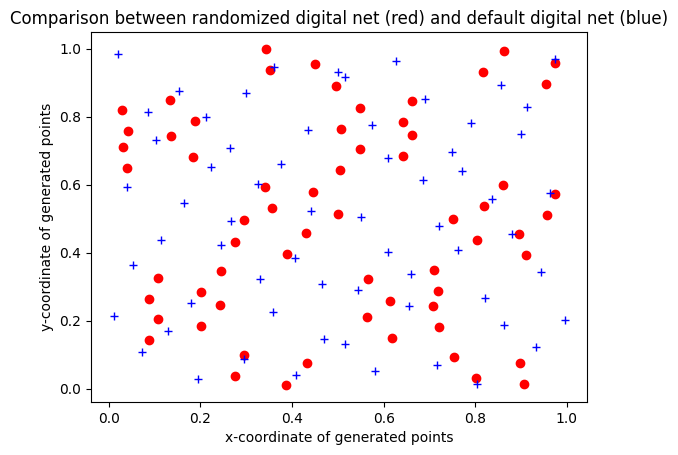

In [ ]:
plt.plot(Randomized[:,0],Randomized[:,1],'ro',Default[:,0],Default[:,1],'b+')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.title("Comparison between randomized digital net (red) and default digital net (blue)")
plt.show()

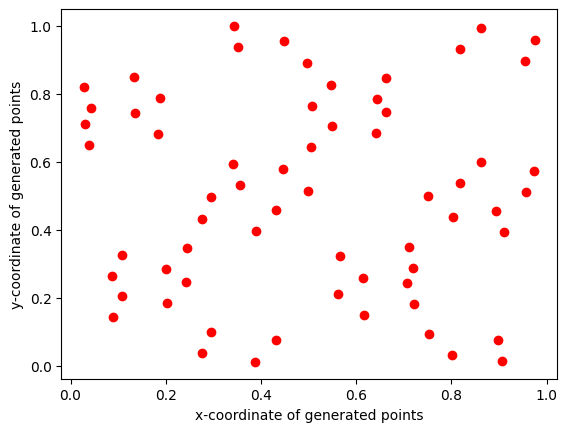

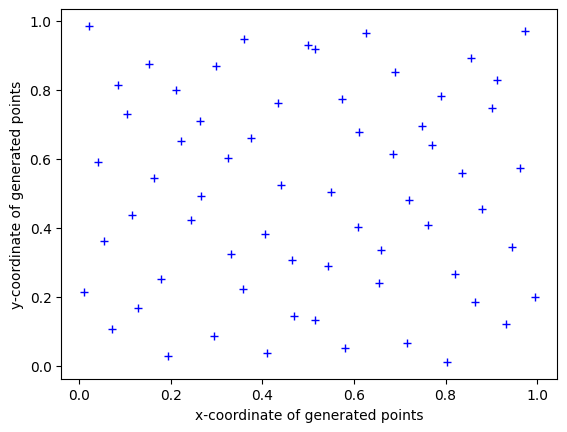

In [ ]:
plt.plot(Randomized[:,0],Randomized[:,1],'ro')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.show()
plt.plot(Default[:,0],Default[:,1],'b+')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.show()

### Integration